# Naive bayes

http://scikit-learn.org/stable/modules/naive_bayes.html

Методы sklearn.naive_bayes - это набор методов, которые основаны на применении теоремы Байеса с "наивным" предположением о условной независимости любой пары признаков $(x_i, x_j)$ при условии выбранного значения целевой переменной $y$. 

Теорема Байеса утверждает, что:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                    {P(x_1, \dots, x_n)}$$

Используя "наивное" предположение о условной независимости пар признаков

$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$

можно преобразовать теорему Байеса к

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                    {P(x_1, \dots, x_n)}$$

Поскольку $P(x_1, \dots, x_n)$ - известные значения признаков для выбранного объекта, мы можем использовать следующее правило:

$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$

# Gaussian naive bayes

В GaussianNB вероятность значений признака предполагается распределенной по Гауссу:

$$ P(x_i | y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

Параметры $\sigma_y$ and $\mu_y$ оцениваются с помощью метода максимального правдоподобия.

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [40]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [41]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [42]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1])

Дообучение через метод `partial_fit`:
* онлайн обучение
* обучение батчами если много данных

In [43]:
gnb1 = GaussianNB()

kf = KFold(n_splits=3, shuffle=True, random_state=2)
gen = kf.split(X_train)

_, test = next(gen)
gnb1.partial_fit(X_train[test], y_train[test],classes=[0,1,2])

_, test = next(gen)
gnb1.partial_fit(X_train[test], y_train[test])

_, test = next(gen)
gnb1.partial_fit(X_train[test], y_train[test])

GaussianNB()

In [44]:
y_pred = gnb1.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred)

0.9333333333333333

# Sentiment analysis

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Источник данных - [kaggle](https://www.kaggle.com/datasets/lishaoshao/tweet-sentiment-extraction-wpf/).

In [57]:
tweets_df = pd.read_csv('twitter.csv')

In [58]:
tweets_df.text.sample().values[0]

' hun are you okay? I see alot of your posts your exercising like mad,not eating or sleeping'

Посмотрим на распределение классов.

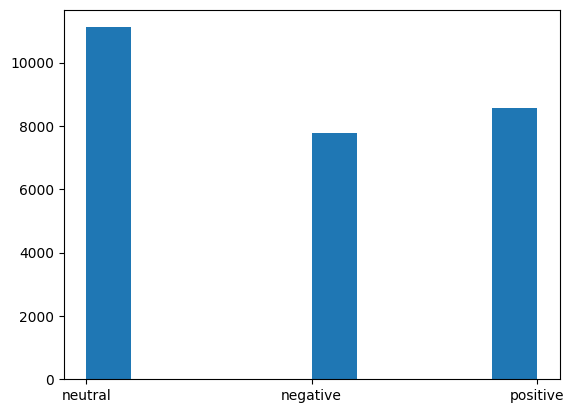

In [59]:
plt.hist(tweets_df['sentiment'].values)
plt.show()

Давайте будем работать только с двумя классами.

In [60]:
tweets_df = tweets_df[tweets_df.sentiment!='neutral']

In [61]:
tweets_df['length'] = tweets_df['text'].apply(len)

Посмотрим на распределение длины твитов.

<Axes: ylabel='Frequency'>

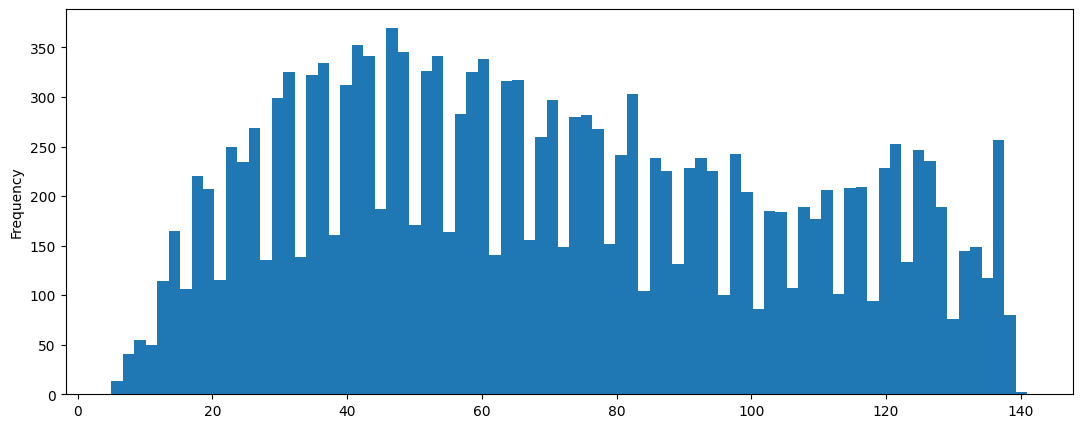

In [62]:
tweets_df['length'].plot(bins = 80, figsize = (13,5), kind = 'hist')

In [63]:
tweets_df['label'] = tweets_df['sentiment'].map({'positive':1,'negative':0})

In [64]:
tweets_df.describe()

,length,label
count,16363.000000,16363.000000
mean,70.451934,0.524476
std,34.889314,0.499416
min,5.000000,0.000000
25%,42.000000,0.000000
50%,66.000000,1.000000
75%,98.000000,1.000000
max,141.000000,1.000000


Библиотека позволяет строить красивые облака слов.

In [65]:
#%pip install WordCloud

In [66]:
from wordcloud import WordCloud

In [67]:
sentences = tweets_df['text'].tolist()                  
joined_sentences = ' '.join(sentences)                 

Общее облако слов.

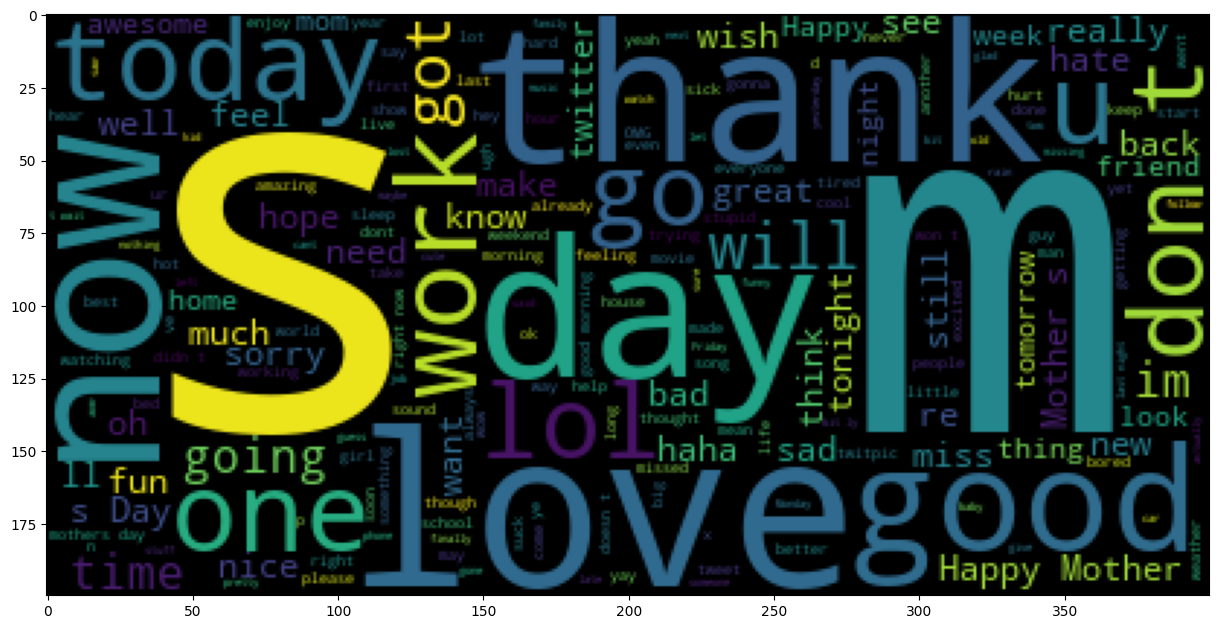

In [68]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(joined_sentences))

Облако слов для положительных твитов.

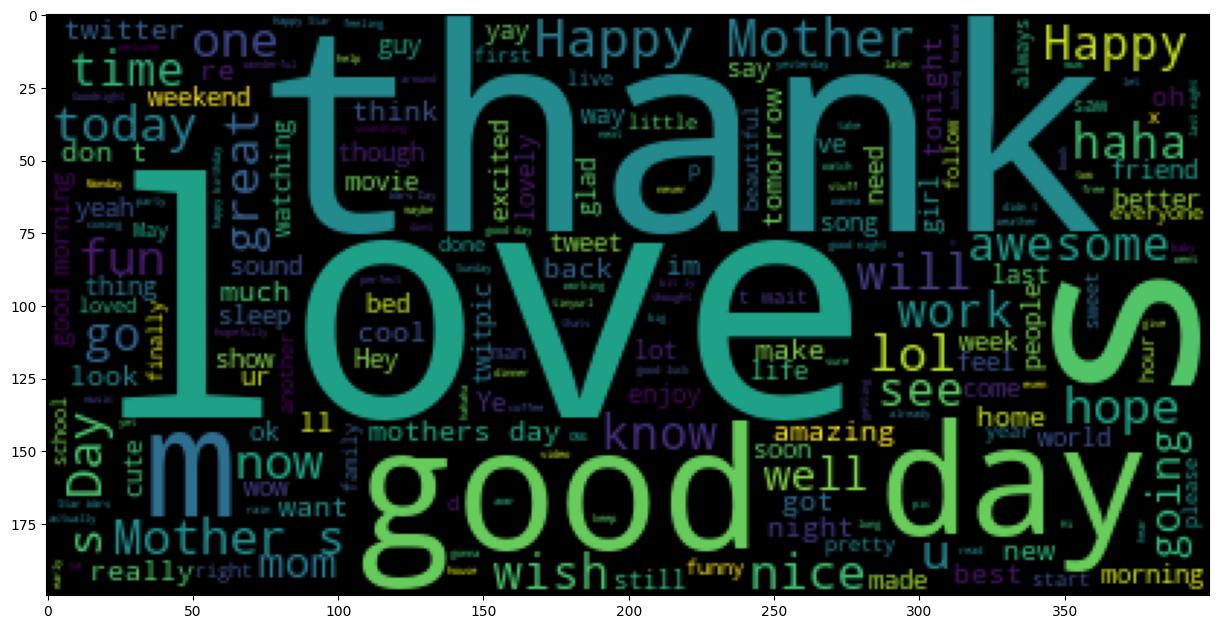

In [69]:
pos_sentences = tweets_df[tweets_df.label==1]['text'].tolist()                    
joined_pos_sentences = ' '.join(pos_sentences)     
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(joined_pos_sentences))

Облако слов для отрицательных твитов.

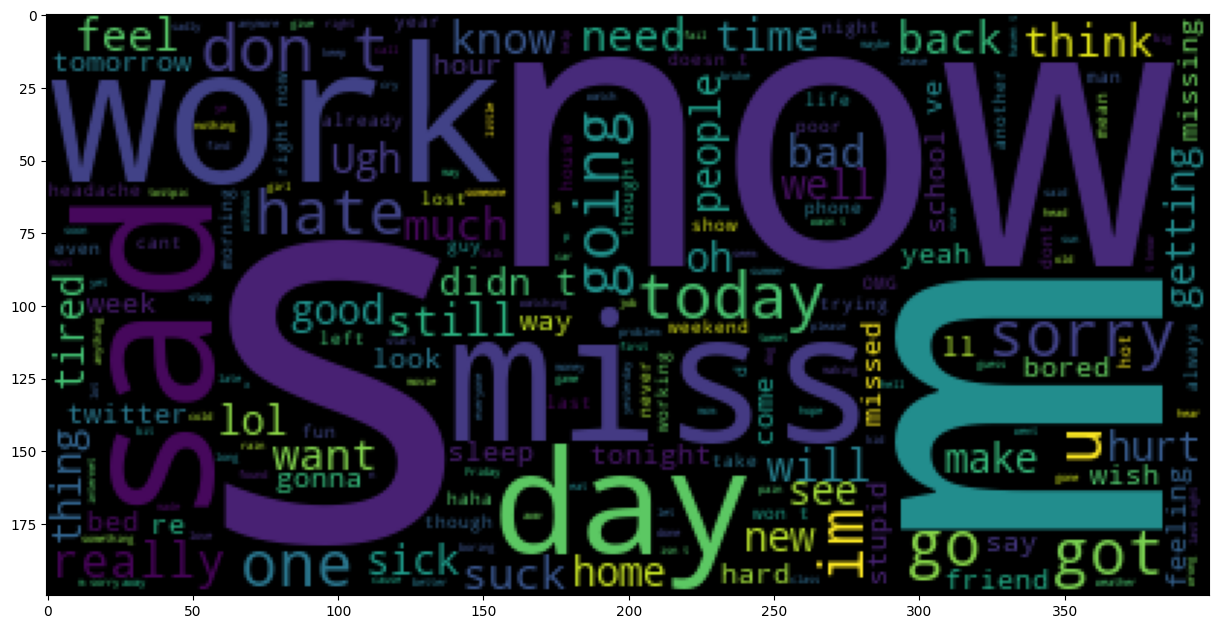

In [70]:
neg_sentences = tweets_df[tweets_df.label==0]['text'].tolist()                   
joined_neg_sentences = ' '.join(neg_sentences)          
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(joined_neg_sentences))

Вообще было бы хорошо провести чистку текста - убрать пунктуацию, ссылки, стоп-слова, провести стемминг. Но мы сейчас не будем этим заниматься.

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
final_vectorized_data = count_vectorizer.fit_transform(tweets_df['text'])  

In [73]:
final_vectorized_data

<16363x18782 sparse matrix of type '<class 'numpy.int64'>'
	with 192405 stored elements in Compressed Sparse Row format>

In [74]:
vectorized_array = final_vectorized_data.toarray()

In [75]:
X = final_vectorized_data
y = tweets_df['label']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Обучим наш классификатор.

In [77]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)

<Axes: >

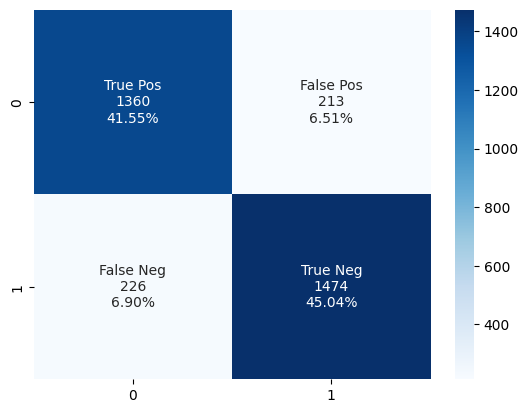

In [80]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)

group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [81]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1573
           1       0.87      0.87      0.87      1700

    accuracy                           0.87      3273
   macro avg       0.87      0.87      0.87      3273
weighted avg       0.87      0.87      0.87      3273

